# Data Preparation and Exploration
This section loads the dataset, displays basic information, and encodes the target variable for modeling.

# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [59]:
# Import required libraries and load the dataset
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Display basic information about the dataset
print(crops.head())
print("Unique crop types:", crops["crop"].unique())
print("Missing values in crop column:", crops["crop"].isna().sum())

# Encode the target variable (crop) as categorical codes
crops["crop_codes"] = crops["crop"].astype("category").cat.codes
print(crops.head())

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
Unique crop types: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
Missing values in crop column: 0
    N   P   K        ph  crop  crop_codes
0  90  42  43  6.502985  rice          20
1  85  58  41  7.038096  rice          20
2  60  55  44  7.840207  rice          20
3  74  35  40  6.980401  rice          20
4  78  42  42  7.628473  rice          20


Best parameters found:  {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}
Best cross-validation accuracy:  0.70625


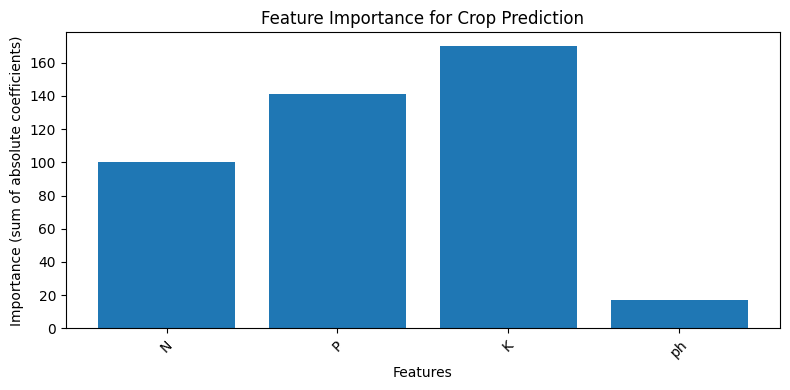

In [60]:
# Prepare features and target variable
X = crops.drop(columns=["crop", "crop_codes"]).values
y = crops["crop_codes"].values
names = crops.drop(columns=["crop", "crop_codes"]).columns

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()

# Define hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [1000, 2000, 5000]
}

# Fit the scaler to the training data and transform both train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression model
logreg = LogisticRegression()

# Perform grid search with cross-validation
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation accuracy: ", grid.best_score_)

# Get coefficients and predictions from the best model
coef = grid.best_estimator_.coef_
y_pred = grid.predict(X_test)

# Find the most important feature using model coefficients
feature_importance = np.abs(coef).sum(axis=0)
best_feature_index = np.argmax(feature_importance)
best_feature = names[best_feature_index]

# Visualize feature importance
plt.figure(figsize=(8, 4))
plt.bar(names, feature_importance)
plt.xlabel("Features")
plt.ylabel("Importance (sum of absolute coefficients)")
plt.title("Feature Importance for Crop Prediction")
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("plots/feature_importance.png")
plt.show()

# Model Training, Hyperparameter Tuning, and Evaluation
This section splits the data, standardizes features, tunes hyperparameters using GridSearchCV, and evaluates the model with accuracy and feature importance visualizations.

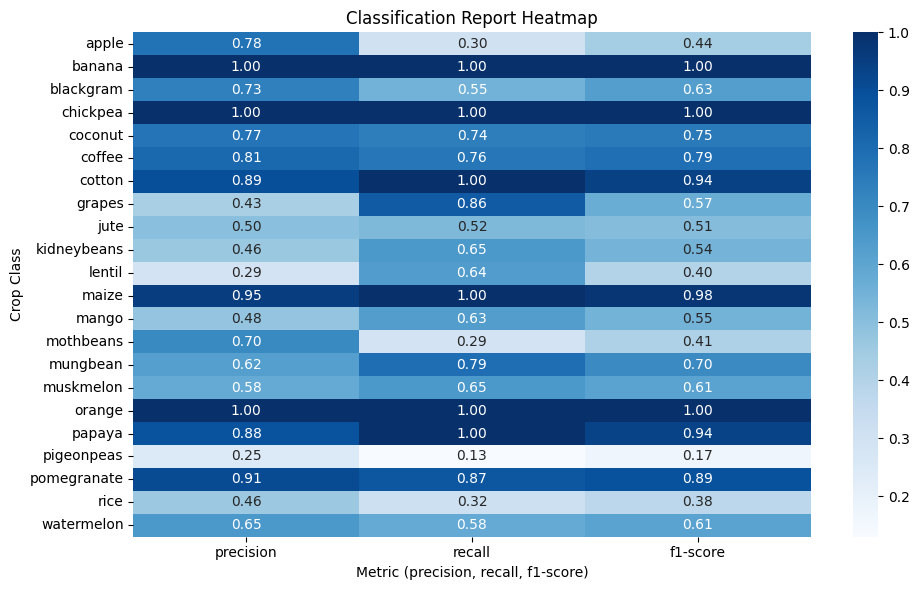

In [61]:
# Visualize the classification report as a heatmap for better interpretability
report_dict = classification_report(y_test, y_pred, target_names=crops['crop'].astype('category').cat.categories, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().iloc[:-3]  # Remove avg/total rows
plt.figure(figsize=(10,6))
sns.heatmap(report_df.iloc[:,:3], annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Heatmap')
plt.ylabel('Crop Class')
plt.xlabel('Metric (precision, recall, f1-score)')

plt.tight_layout()
plt.savefig("plots/classification_report_heatmap.png")
plt.show()

# Classification Report Visualization
This section visualizes precision, recall, and f1-score for each crop class as a heatmap for easier interpretation of model performance.